In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import struct
import sys
import time
from model.pgm import *

In [2]:
# Real World Data
# 'd' for double, 'l' for uint
datafile = open('./data/latilong_china.double','rb')
data = datafile.read(8)
data_len, = struct.unpack('d', data)
data_len = int(data_len)
data=[]
for i in tqdm(range(data_len)):
    data_bin = datafile.read(8)
    data_unix, = struct.unpack('d',data_bin)
    data.append(data_unix)

100%|██████████| 1785607/1785607 [00:01<00:00, 1321800.99it/s]


In [5]:
epsilon_list = list(range(25,400,25))
Pgm_Index_seg_num = []
Pgm_Index_mae = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    epsilon = epsilon_list[i]
    Pgm_Index = Pgm(epsilon)
    Pgm_Index.learn_index(data)
    Pgm_Index_seg_num.append(Pgm_Index.seg_num)
    Pgm_Index_mae.append(Pgm_Index.mae)
endtime = time.perf_counter()
avg_time = (endtime - starttime) / len(epsilon_list)
avg_time

  1%|          | 9134/1785607 [00:00<00:19, 91339.22it/s]

25 3117 14.74410046555597


  0%|          | 8846/1785607 [00:00<00:20, 88454.39it/s]

50 1714 30.766488930654955


  0%|          | 8445/1785607 [00:00<00:21, 84449.28it/s]

75 1230 47.24802266120148


  0%|          | 8511/1785607 [00:00<00:20, 85101.76it/s]

100 982 63.47483740823149


  0%|          | 4219/1785607 [00:00<00:42, 42176.87it/s]

125 826 81.4400895605808


  0%|          | 4174/1785607 [00:00<00:42, 41732.98it/s]

150 699 98.33406119039631


  0%|          | 8120/1785607 [00:00<00:21, 81198.34it/s]

175 614 113.94043650142501


  0%|          | 8041/1785607 [00:00<00:22, 80398.58it/s]

200 551 130.4786926798562


  0%|          | 8228/1785607 [00:00<00:21, 82279.10it/s]

225 488 144.68375516001


  0%|          | 8013/1785607 [00:00<00:22, 80123.01it/s]

250 441 160.4615870121477


  0%|          | 7975/1785607 [00:00<00:22, 79742.85it/s]

275 417 176.9076095691829


  0%|          | 7892/1785607 [00:00<00:23, 76887.84it/s]

300 390 192.7976626435716


  0%|          | 4133/1785607 [00:00<00:43, 41327.18it/s]

325 365 211.2603798036186


  0%|          | 7803/1785607 [00:00<00:22, 78020.96it/s]

350 343 225.08953593931923


100%|██████████| 1785607/1785607 [00:22<00:00, 77977.38it/s]

375 332 240.17303359585844


20.73779828026891

In [4]:
epsilon_list = list(range(25,400,25))
Pgm_Dynamic_Index_seg_num = []
Pgm_Dynamic_Index_mae = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    Pgm_Dynamic_Index = PgmDynamic(epsilon_list[i],init_epsilon=range(25,400,50))
    Pgm_Dynamic_Index.learn_index_lookahead(data)
    Pgm_Dynamic_Index_seg_num.append(Pgm_Dynamic_Index.seg_num)
    Pgm_Dynamic_Index_mae.append(Pgm_Dynamic_Index.mae)
endtime = time.perf_counter()
avg_time = (endtime - starttime) / len(epsilon_list)
avg_time

100%|██████████| 1785607/1785607 [00:18<00:00, 95280.51it/s] 


25 3121 13.968462265212894


100%|██████████| 1785607/1785607 [00:19<00:00, 93278.81it/s] 


50 1654 29.6521743026321


100%|██████████| 1785607/1785607 [00:19<00:00, 92651.42it/s] 


75 1184 45.48588295184775


100%|██████████| 1785607/1785607 [00:19<00:00, 90269.80it/s] 


100 941 61.91444645994331


100%|██████████| 1785607/1785607 [00:20<00:00, 88460.32it/s] 


125 787 78.0141212484046


100%|██████████| 1785607/1785607 [00:20<00:00, 87780.29it/s]


150 675 94.44630425395958


100%|██████████| 1785607/1785607 [00:20<00:00, 86933.95it/s]


175 597 111.6760854992168


100%|██████████| 1785607/1785607 [00:20<00:00, 85545.30it/s]


200 537 126.68455824825955


100%|██████████| 1785607/1785607 [00:20<00:00, 85574.41it/s]


225 482 141.1070117892683


100%|██████████| 1785607/1785607 [00:21<00:00, 84336.04it/s]


250 437 154.7281042245018


100%|██████████| 1785607/1785607 [00:21<00:00, 83602.61it/s]


275 401 170.9820548418549


100%|██████████| 1785607/1785607 [00:21<00:00, 82075.29it/s]


300 379 187.81799242498488


100%|██████████| 1785607/1785607 [00:21<00:00, 81807.02it/s]


325 358 202.14982300136592


100%|██████████| 1785607/1785607 [00:21<00:00, 81318.47it/s]


350 338 218.03201432342055


100%|██████████| 1785607/1785607 [00:22<00:00, 80208.33it/s]

375 325 234.07106826978165


21.07807340497772

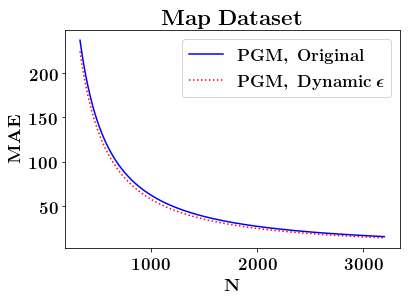

In [9]:
x = np.arange(330,3200)
import matplotlib.pylab as pylab
label_size = 18.5
ticks_size = 17
title_size = 22.5
legend_size = 17
params = {'legend.fontsize': legend_size,
          'axes.labelsize': label_size,
          'axes.titlesize': title_size,
          'xtick.labelsize': ticks_size,
          'ytick.labelsize': ticks_size}
pylab.rcParams.update(params)
plt.rcParams["text.usetex"] = True
plt.rcParams['text.latex.preamble'] = [r'\boldmath']
markers = ["v", "^", "o", "<", ">", "1", "2", "3", "4"]
colors = ["b", "r", "g", "purple", "teal", "tomato", "olive", "deeppink"]
linestyles = ['solid', 'dotted', '-.', ':', "--", (0, (3, 10, 1, 10)), (0, (3, 5, 1, 5, 1, 5)),
              (0, (5, 10))]

plt.title('$\mathrm{Map~Dataset}$')
plt.xlabel('$\mathrm{N}$')
plt.ylabel('$\mathrm{MAE}$')
plt.xticks()
plt.yticks()
def func(x,a,b):
    return a * x**b
p1,_ = curve_fit(func,Pgm_Index_seg_num,Pgm_Index_mae)
p2,_ = curve_fit(func,Pgm_Dynamic_Index_seg_num,Pgm_Dynamic_Index_mae)
#p3,_ = curve_fit(func,Pgm_Index_seg_num,Pgm_Index_mae)
#p4,_ = curve_fit(func,Pgm_Dynamic_Index_seg_num,Pgm_Dynamic_Index_mae)
plt.plot(x,p1[0]*x**p1[1],c=colors[0], linestyle=linestyles[0], label='$\mathrm{PGM,~Original}$')
#plt.scatter(Pgm_Index_seg_num, Pgm_Index_mae,c=colors[0],marker=markers[0])
plt.plot(x,p2[0]*x**p2[1],c=colors[1], linestyle=linestyles[1], label='$\mathrm{PGM,~Dynamic~\epsilon}$')
#plt.scatter(Pgm_Dynamic_Index_seg_num, Pgm_Dynamic_Index_mae,c=colors[1],marker=markers[1])
plt.legend()
#plt.savefig("{}.pdf".format("results/PGM/Map_tradeoff_30"), bbox_inches='tight', pad_inches=0)

In [10]:
def calc_AUC(x,y):
    area=0
    for i in range(len(x)-1):
        area += (y[i]+y[i+1])*(x[i+1]-x[i]) / 2 
    return area
AUC1 = calc_AUC(x,p1[0]*x**p1[1])
AUC2 = calc_AUC(x,p2[0]*x**p2[1])
#AUC3 = calc_AUC(x,p3[0]*x**p3[1])
AUC1,AUC2,1-AUC2/AUC1

(141415.15546316444, 131039.34297351795, 0.07337129076203686)